In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scienceplots as sp
import seaborn as sns

column_width = 3.5

with plt.style.context(['science']):
    sci_cycle = plt.rcParams['axes.prop_cycle']

/home/dannya1/anaconda3/envs/torch2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
SHOW = True

# Fine-tuning Down Plots

In [3]:
df_timing = pd.read_csv('./results/cpu.cifar100.csv')
df_quality = pd.read_csv('./results/best.cifar100.csv')

In [4]:
b = ['b1', 'b2', 'b4', 'b8', 'b16', 'b32', 'b64', 'b128', 'b256']

# Get the model names
model_names = df_timing['Model Name'].unique()

# Loop over each model, and convert absolute times to ratios
for model_name in model_names:
    # Extract the first row values for selected columns
    model_df = df_timing[df_timing['Model Name'] == model_name]
    first_row_values = model_df.loc[model_df.index.min(), b]

    # Divide all rows by the first row values
    model_df[b] = model_df[b].div(first_row_values, axis=1)
    
    # Overwrite old dataframe
    df_timing[df_timing['Model Name'] == model_name] = model_df

/tmp/ipykernel_3944359/1878743880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[b] = model_df[b].div(first_row_values, axis=1)
/tmp/ipykernel_3944359/1878743880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[b] = model_df[b].div(first_row_values, axis=1)
/tmp/ipykernel_3944359/1878743880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [5]:
condition_resnet20 = (df_timing['Model Name'] == 'cifar100_resnet20') & (df_timing['Nominal Sparsity'] == 0.15) #15 
condition_resnet32 = (df_timing['Model Name'] == 'cifar100_resnet32') & (df_timing['Nominal Sparsity'] == 0.20)
condition_resnet44 = (df_timing['Model Name'] == 'cifar100_resnet44') & (df_timing['Nominal Sparsity'] == 0.20)
condition_resnet56 = (df_timing['Model Name'] == 'cifar100_resnet56') & (df_timing['Nominal Sparsity'] == 0.20)
condition_vgg11 = (df_timing['Model Name'] == 'cifar100_vgg11_bn') & (df_timing['Nominal Sparsity'] == 0.45) #45
condition_vgg13 = (df_timing['Model Name'] == 'cifar100_vgg13_bn') & (df_timing['Nominal Sparsity'] == 0.35) #35
condition_vgg16 = (df_timing['Model Name'] == 'cifar100_vgg16_bn') & (df_timing['Nominal Sparsity'] == 0.35) #35
condition_vgg19 = (df_timing['Model Name'] == 'cifar100_vgg19_bn') & (df_timing['Nominal Sparsity'] == 0.35) #35
df_timing[condition_resnet20 | condition_resnet32 | condition_resnet44 | condition_resnet56 | condition_vgg11 | condition_vgg13 | condition_vgg16 | condition_vgg19]

,Model Name,Nominal Sparsity,Actual Density,b1,b2,b4,b8,b16,b32,b64,b128,b256
3,cifar100_resnet20,0.15,0.718492,0.806058,0.966785,1.017757,1.07432,1.084741,1.098594,1.101227,1.077417,1.064245
14,cifar100_resnet32,0.20,0.643936,0.774533,0.930401,0.974289,1.010142,1.028301,1.029814,1.024354,1.012002,0.987324
24,cifar100_resnet44,0.20,0.643079,0.767783,0.942632,0.992844,1.032973,1.053108,1.050896,1.041549,1.024016,1.013449
34,cifar100_resnet56,0.20,0.642609,0.760858,0.914642,0.97093,1.007446,1.021883,1.030643,1.019663,0.994746,0.98418
49,cifar100_vgg11_bn,0.45,0.332356,0.505198,0.455453,0.484951,0.489987,0.493736,0.495729,0.492641,0.480036,0.466741
57,cifar100_vgg13_bn,0.35,0.446900,0.642552,0.593444,0.622548,0.635165,0.633969,0.626823,0.627534,0.616266,0.606027
67,cifar100_vgg16_bn,0.35,0.438525,0.633146,0.578071,0.627149,0.641542,0.640618,0.626989,0.632321,0.622251,0.619238
77,cifar100_vgg19_bn,0.35,0.434467,0.626003,0.568349,0.6162,0.635544,0.643965,0.630684,0.632284,0.61889,0.613373


In [6]:
timing_vgg_16 = df_timing[(df_timing['Model Name'] == 'cifar100_vgg16_bn')]
# timing_vgg_16
timing_resnet56 = df_timing[(df_timing['Model Name'] == 'cifar100_resnet56')]
# timing_resnet56

In [7]:
vgg_inference_latency = timing_vgg_16[['Nominal Sparsity', 'Actual Density', 'b1']]
vgg_inference_latency['Nominal Sparsity'] *= 100
vgg_inference_latency['Nominal Sparsity'] //= 5
vgg_inference_latency['Nominal Sparsity'] *= 30
vgg_inference_latency['Nominal Sparsity'] = vgg_inference_latency['Nominal Sparsity']
vgg_inference_latency['Actual Density'] = 1 - vgg_inference_latency['Actual Density']
vgg_inference_latency['Actual Density'] *= 100 
vgg_inference_latency.rename(columns={'Nominal Sparsity': 'epoch', 'b1': 'Inference Latency', 'Actual Density': 'Sparsity'}, inplace=True)
vgg_inference_latency = vgg_inference_latency[vgg_inference_latency['epoch'] < 211]

resnet_inference_latency = timing_resnet56[['Nominal Sparsity', 'Actual Density', 'b1']]
resnet_inference_latency['Nominal Sparsity'] *= 100
resnet_inference_latency['Nominal Sparsity'] //= 5
resnet_inference_latency['Nominal Sparsity'] *= 30
resnet_inference_latency['Nominal Sparsity'] = resnet_inference_latency['Nominal Sparsity']
resnet_inference_latency['Actual Density'] = 1 - resnet_inference_latency['Actual Density']
resnet_inference_latency['Actual Density'] *= 100 
resnet_inference_latency.rename(columns={'Nominal Sparsity': 'epoch', 'b1': 'Inference Latency', 'Actual Density': 'Sparsity'}, inplace=True)
resnet_inference_latency = resnet_inference_latency[resnet_inference_latency['epoch'] < 211]
# vgg_inference_latency

/tmp/ipykernel_3944359/1678315112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgg_inference_latency['Nominal Sparsity'] *= 100
/tmp/ipykernel_3944359/1678315112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgg_inference_latency['Nominal Sparsity'] //= 5
/tmp/ipykernel_3944359/1678315112.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [8]:
renaming = {}
epochs = []
for i in range(0, 96, 5):
    renaming[f'{i}%'] = (i/5 * 30)
    epochs.append((i/5 * 30))
# renaming

In [9]:
quality_vgg16 = df_quality[df_quality['Model Name'] == 'cifar100_vgg16_bn']
quality_vgg16.rename(columns=renaming, inplace=True)
quality_vgg16 = quality_vgg16[epochs]
quality_vgg16 = quality_vgg16.T
quality_vgg16.rename(columns={6 : 'Accuracy'}, inplace=True)
quality_vgg16 = quality_vgg16[quality_vgg16['Accuracy'] > 0.74 - 0.03]
quality_vgg16['Accuracy'] *= 100
quality_vgg16.rename_axis('epoch', inplace=True)
# quality_vgg16

quality_resnet56 = df_quality[df_quality['Model Name'] == 'cifar100_resnet56']
quality_resnet56.rename(columns=renaming, inplace=True)
quality_resnet56 = quality_resnet56[epochs]
quality_resnet56 = quality_resnet56.T
quality_resnet56.rename(columns={3 : 'Accuracy'}, inplace=True)
quality_resnet56 = quality_resnet56[quality_resnet56['Accuracy'] > 0.7263 - 0.03]
quality_resnet56['Accuracy'] *= 100
quality_resnet56.rename_axis('epoch', inplace=True)
# quality_resnet56

/tmp/ipykernel_3944359/1264359469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_vgg16.rename(columns=renaming, inplace=True)
/tmp/ipykernel_3944359/1264359469.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_resnet56.rename(columns=renaming, inplace=True)


In [10]:
vgg16_data = pd.merge(vgg_inference_latency, quality_vgg16, on='epoch')
vgg16_data['epoch'] = vgg16_data['epoch'].astype('int')
# vgg16_data
resnet56_data = pd.merge(resnet_inference_latency, quality_resnet56, on='epoch')
resnet56_data['epoch'] = resnet56_data['epoch'].astype('int')

In [11]:
vgg16_data

,epoch,Sparsity,Inference Latency,Accuracy
0,0,0.000000,1.0,74.000000
1,30,9.590558,1.261529,73.360002
2,60,18.429669,1.127868,73.140001
3,90,26.976333,1.023524,72.670001
4,120,34.874085,0.927428,72.090000
5,150,42.521538,0.797067,71.660000
6,180,49.674946,0.719463,71.730000
7,210,56.147535,0.633146,71.310002


In [12]:
resnet56_data

,epoch,Sparsity,Inference Latency,Accuracy
0,0,0.000000,1.0,72.630000
1,30,9.855324,0.881244,71.619999
2,60,18.089050,0.842123,71.249998
3,90,28.423050,0.801985,70.469999
4,120,35.739079,0.760858,70.300001


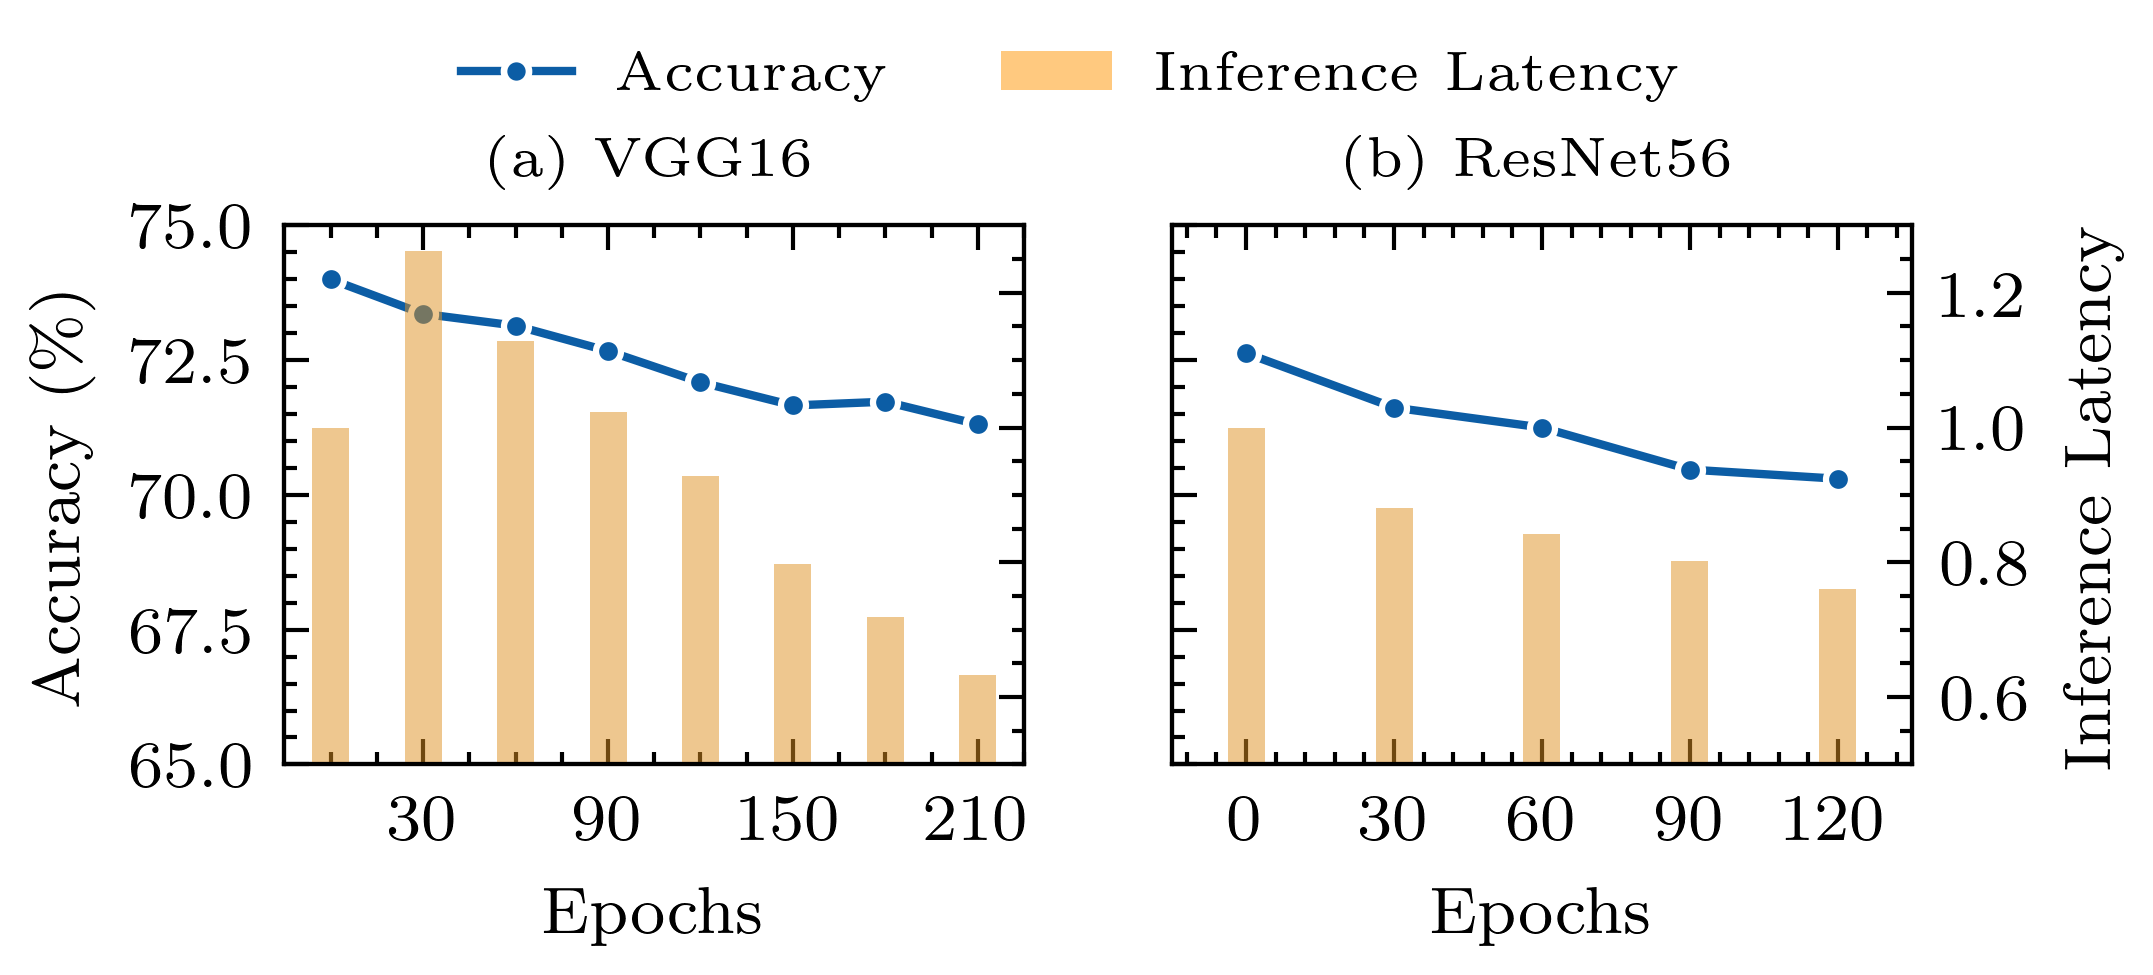

In [13]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    # Create a figure and axis
    fig, (ax1, ax2) = plt.subplots(figsize=(column_width, column_width/3), ncols=2)

    # VGG Line plot
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    line_accuracy = sns.lineplot(data=vgg16_data['Accuracy'], marker='o', sort=False, c=sci_cycle.by_key()['color'][0], ax=ax1, linewidth=1, markersize=3)
    ax1.set_ylim(65, 75)
    
    # Axis name
    ax1.set_ylabel('Accuracy (\%)')
    
    # Flip axis
    ax1_flip = ax1.twinx()

    # VGG Bar plot
    bar_inference_latency = sns.barplot(data=vgg16_data, x='epoch', y='Inference Latency', alpha=0.5, color=sci_cycle.by_key()['color'][2], ax=ax1_flip, width=0.4)
    ax1_flip.set_ylim(0.5, 1.3)
    
    # Label x-axis
    ax1.set_xlabel('Epochs')
    
    # Annotate points
    # for i, s in enumerate(vgg16_data['Sparsity']):
    #     if (i + 1) % 2 == 0:
    #         ax1.text(i - 0.35, vgg16_data['Accuracy'][i] + 0.30, f'{s:.1f}', size='x-small', c=sci_cycle.by_key()['color'][3])
    
    # Set the x-axis ticks to every other tick
    ax1_flip.set_xticks(ax1_flip.get_xticks()[1::2])
    
    # Remove the ytick labels and axis label
    ax1_flip.set_yticklabels([])
    ax1_flip.set_ylabel('')
    
    # ResNet Line Plot
    sns.lineplot(data=resnet56_data['Accuracy'], marker='o', sort=False, c=sci_cycle.by_key()['color'][0], ax=ax2, linewidth=1, markersize=3)
    ax2.set_ylim(65, 75)
    
    # Remove the ytick labels and axis label
    ax2.set_yticklabels([])
    ax2.set_ylabel('')
    
    # Flip axis
    ax2_flip = ax2.twinx()
    
    # ResNet Bar Plot
    sns.barplot(data=resnet56_data, x='epoch', y='Inference Latency', alpha=0.5, color=sci_cycle.by_key()['color'][2], ax=ax2_flip, width=0.25)
    ax2_flip.set_ylim(0.5, 1.3)
    
    # Label x-axis
    ax2.set_xlabel('Epochs')
    
    # Title
    ax2.set_title('(b) ResNet56', fontsize='small')
    ax1.set_title('(a) VGG16', fontsize='small')
    
    # Add a legend
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][0], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Accuracy'),
                      Patch(color=sci_cycle.by_key()['color'][2], alpha=0.5, label='Inference Latency', linewidth=0)]
    
    fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize='small')
    
    # Annotate points
    # for i, s in enumerate(resnet56_data['Sparsity']):
    #     ax2.text(i - 0.25, resnet56_data['Accuracy'][i] + 0.30, f'{s:.1f}', size='x-small', c=sci_cycle.by_key()['color'][3])
    
    if SHOW: 
        plt.show()
    else:
        plt.savefig('./results/plots/finetuning_trace.pgf', bbox_inches='tight')
        plt.close()

# Table 

In [14]:
df_timing = pd.read_csv('./results/cpu.cifar100.csv')
df_quality = pd.read_csv('./results/best.cifar100.csv')

In [15]:
b = ['b1', 'b2', 'b4', 'b8', 'b16', 'b32', 'b64', 'b128', 'b256']

# Get the model names
model_names = df_timing['Model Name'].unique()

# Loop over each model, and convert absolute times to ratios
for model_name in model_names:
    # Extract the first row values for selected columns
    model_df = df_timing[df_timing['Model Name'] == model_name]
    first_row_values = model_df.loc[model_df.index.min(), b]

    # Divide all rows by the first row values
    model_df[b] = model_df[b].div(first_row_values, axis=1)
    
    # Overwrite old dataframe
    df_timing[df_timing['Model Name'] == model_name] = model_df

/tmp/ipykernel_3944359/1878743880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[b] = model_df[b].div(first_row_values, axis=1)
/tmp/ipykernel_3944359/1878743880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df[b] = model_df[b].div(first_row_values, axis=1)
/tmp/ipykernel_3944359/1878743880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [16]:
condition_resnet20 = (df_timing['Model Name'] == 'cifar100_resnet20') & (df_timing['Nominal Sparsity'] == 0.15) #15 
condition_resnet32 = (df_timing['Model Name'] == 'cifar100_resnet32') & (df_timing['Nominal Sparsity'] == 0.20)
condition_resnet44 = (df_timing['Model Name'] == 'cifar100_resnet44') & (df_timing['Nominal Sparsity'] == 0.20)
condition_resnet56 = (df_timing['Model Name'] == 'cifar100_resnet56') & (df_timing['Nominal Sparsity'] == 0.20)
condition_vgg11 = (df_timing['Model Name'] == 'cifar100_vgg11_bn') & (df_timing['Nominal Sparsity'] == 0.45) #45
condition_vgg13 = (df_timing['Model Name'] == 'cifar100_vgg13_bn') & (df_timing['Nominal Sparsity'] == 0.35) #35
condition_vgg16 = (df_timing['Model Name'] == 'cifar100_vgg16_bn') & (df_timing['Nominal Sparsity'] == 0.35) #35
condition_vgg19 = (df_timing['Model Name'] == 'cifar100_vgg19_bn') & (df_timing['Nominal Sparsity'] == 0.35) #35
df_timing = df_timing[condition_resnet20 | condition_resnet32 | condition_resnet44 | condition_resnet56 | condition_vgg11 | condition_vgg13 | condition_vgg16 | condition_vgg19]
df_timing

,Model Name,Nominal Sparsity,Actual Density,b1,b2,b4,b8,b16,b32,b64,b128,b256
3,cifar100_resnet20,0.15,0.718492,0.806058,0.966785,1.017757,1.07432,1.084741,1.098594,1.101227,1.077417,1.064245
14,cifar100_resnet32,0.20,0.643936,0.774533,0.930401,0.974289,1.010142,1.028301,1.029814,1.024354,1.012002,0.987324
24,cifar100_resnet44,0.20,0.643079,0.767783,0.942632,0.992844,1.032973,1.053108,1.050896,1.041549,1.024016,1.013449
34,cifar100_resnet56,0.20,0.642609,0.760858,0.914642,0.97093,1.007446,1.021883,1.030643,1.019663,0.994746,0.98418
49,cifar100_vgg11_bn,0.45,0.332356,0.505198,0.455453,0.484951,0.489987,0.493736,0.495729,0.492641,0.480036,0.466741
57,cifar100_vgg13_bn,0.35,0.446900,0.642552,0.593444,0.622548,0.635165,0.633969,0.626823,0.627534,0.616266,0.606027
67,cifar100_vgg16_bn,0.35,0.438525,0.633146,0.578071,0.627149,0.641542,0.640618,0.626989,0.632321,0.622251,0.619238
77,cifar100_vgg19_bn,0.35,0.434467,0.626003,0.568349,0.6162,0.635544,0.643965,0.630684,0.632284,0.61889,0.613373


In [17]:
accuracies = [df_quality[df_quality['Model Name'] == 'cifar100_resnet20']['15%'][0],
              df_quality[df_quality['Model Name'] == 'cifar100_resnet32']['20%'][1],
              df_quality[df_quality['Model Name'] == 'cifar100_resnet44']['20%'][2],
              df_quality[df_quality['Model Name'] == 'cifar100_resnet56']['20%'][3],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg11_bn']['45%'][4],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg13_bn']['35%'][5],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg16_bn']['35%'][6],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg19_bn']['35%'][7]]
df_timing['Accuracy'] = accuracies

accuracies = [df_quality[df_quality['Model Name'] == 'cifar100_resnet20']['0%'][0],
              df_quality[df_quality['Model Name'] == 'cifar100_resnet32']['0%'][1],
              df_quality[df_quality['Model Name'] == 'cifar100_resnet44']['0%'][2],
              df_quality[df_quality['Model Name'] == 'cifar100_resnet56']['0%'][3],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg11_bn']['0%'][4],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg13_bn']['0%'][5],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg16_bn']['0%'][6],
              df_quality[df_quality['Model Name'] == 'cifar100_vgg19_bn']['0%'][7]]
df_timing['Original Accuracy'] = accuracies
df_timing

,Model Name,Nominal Sparsity,Actual Density,b1,b2,b4,b8,b16,b32,b64,b128,b256,Accuracy,Original Accuracy
3,cifar100_resnet20,0.15,0.718492,0.806058,0.966785,1.017757,1.07432,1.084741,1.098594,1.101227,1.077417,1.064245,0.6613,0.6883
14,cifar100_resnet32,0.20,0.643936,0.774533,0.930401,0.974289,1.010142,1.028301,1.029814,1.024354,1.012002,0.987324,0.6731,0.7016
24,cifar100_resnet44,0.20,0.643079,0.767783,0.942632,0.992844,1.032973,1.053108,1.050896,1.041549,1.024016,1.013449,0.6886,0.7163
34,cifar100_resnet56,0.20,0.642609,0.760858,0.914642,0.97093,1.007446,1.021883,1.030643,1.019663,0.994746,0.98418,0.7030,0.7263
49,cifar100_vgg11_bn,0.45,0.332356,0.505198,0.455453,0.484951,0.489987,0.493736,0.495729,0.492641,0.480036,0.466741,0.6824,0.7078
57,cifar100_vgg13_bn,0.35,0.446900,0.642552,0.593444,0.622548,0.635165,0.633969,0.626823,0.627534,0.616266,0.606027,0.7203,0.7463
67,cifar100_vgg16_bn,0.35,0.438525,0.633146,0.578071,0.627149,0.641542,0.640618,0.626989,0.632321,0.622251,0.619238,0.7131,0.7400
77,cifar100_vgg19_bn,0.35,0.434467,0.626003,0.568349,0.6162,0.635544,0.643965,0.630684,0.632284,0.61889,0.613373,0.7087,0.7387


In [18]:
table = df_timing[['Model Name', 'Actual Density', 'b1', 'Accuracy', 'Original Accuracy']]
table['Actual Density'] = 1- table['Actual Density']
table['Actual Density'] *= 100
table['Accuracy'] *= 100
table['Original Accuracy'] *= 100
table['b1'] = table['b1'].astype(float).round(2)
table.rename(columns={'Actual Density': 'Sparsity', 'b1': 'Inference Latency'}, inplace=True)
table = table.round(2)
table.T


/tmp/ipykernel_3944359/3624997499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Actual Density'] = 1- table['Actual Density']
/tmp/ipykernel_3944359/3624997499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Actual Density'] *= 100
/tmp/ipykernel_3944359/3624997499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,3,14,24,34,49,57,67,77
Model Name,cifar100_resnet20,cifar100_resnet32,cifar100_resnet44,cifar100_resnet56,cifar100_vgg11_bn,cifar100_vgg13_bn,cifar100_vgg16_bn,cifar100_vgg19_bn
Sparsity,28.15,35.61,35.69,35.74,66.76,55.31,56.15,56.55
Inference Latency,0.81,0.77,0.77,0.76,0.51,0.64,0.63,0.63
Accuracy,66.13,67.31,68.86,70.3,68.24,72.03,71.31,70.87
Original Accuracy,68.83,70.16,71.63,72.63,70.78,74.63,74.0,73.87


# Timing Bar Plot

In [19]:
df_timing_cifar = pd.read_csv('./results/cpu.cifar100.csv')
condition_resnet20 = (df_timing_cifar['Model Name'] == 'cifar100_resnet20') & (df_timing_cifar['Nominal Sparsity'] == 0.15)
condition_resnet32 = (df_timing_cifar['Model Name'] == 'cifar100_resnet32') & (df_timing_cifar['Nominal Sparsity'] == 0.20)
condition_resnet44 = (df_timing_cifar['Model Name'] == 'cifar100_resnet44') & (df_timing_cifar['Nominal Sparsity'] == 0.20)
condition_resnet56 = (df_timing_cifar['Model Name'] == 'cifar100_resnet56') & (df_timing_cifar['Nominal Sparsity'] == 0.20)
condition_vgg11 = (df_timing_cifar['Model Name'] == 'cifar100_vgg11_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.45) 
condition_vgg13 = (df_timing_cifar['Model Name'] == 'cifar100_vgg13_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.35) 
condition_vgg16 = (df_timing_cifar['Model Name'] == 'cifar100_vgg16_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.35) 
condition_vgg19 = (df_timing_cifar['Model Name'] == 'cifar100_vgg19_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.35) 
condition_resnet20_ = (df_timing_cifar['Model Name'] == 'cifar100_resnet20') & (df_timing_cifar['Nominal Sparsity'] == 0.0)
condition_resnet32_ = (df_timing_cifar['Model Name'] == 'cifar100_resnet32') & (df_timing_cifar['Nominal Sparsity'] == 0.0)
condition_resnet44_ = (df_timing_cifar['Model Name'] == 'cifar100_resnet44') & (df_timing_cifar['Nominal Sparsity'] == 0.0)
condition_resnet56_ = (df_timing_cifar['Model Name'] == 'cifar100_resnet56') & (df_timing_cifar['Nominal Sparsity'] == 0.0)
condition_vgg11_ = (df_timing_cifar['Model Name'] == 'cifar100_vgg11_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.0) 
condition_vgg13_ = (df_timing_cifar['Model Name'] == 'cifar100_vgg13_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.0) 
condition_vgg16_ = (df_timing_cifar['Model Name'] == 'cifar100_vgg16_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.0) 
condition_vgg19_ = (df_timing_cifar['Model Name'] == 'cifar100_vgg19_bn') & (df_timing_cifar['Nominal Sparsity'] == 0.0) 
df_timing_cifar = df_timing_cifar[(condition_resnet20 | condition_resnet32 | condition_resnet44 | condition_resnet56 | 
                                   condition_vgg11 | condition_vgg13 | condition_vgg16 | condition_vgg19 | 
                                   condition_resnet20_ | condition_resnet32_ | condition_resnet44_ | condition_resnet56_ | 
                                   condition_vgg11_ | condition_vgg13_ | condition_vgg16_ | condition_vgg19_)]
df_timing_cifar = df_timing_cifar[['Model Name', 'b1']]
df_timing_cifar

,Model Name,b1
0,cifar100_resnet20,11.830648
3,cifar100_resnet20,9.536184
10,cifar100_resnet32,18.118988
14,cifar100_resnet32,14.033758
20,cifar100_resnet44,24.446049
24,cifar100_resnet44,18.769270
30,cifar100_resnet56,30.646527
34,cifar100_resnet56,23.317667
40,cifar100_vgg11_bn,28.384804
49,cifar100_vgg11_bn,14.339943


In [20]:
df_timing_yolo = pd.read_csv('./results/cpu.coco.csv')
df_timing_yolo.loc[1, 'Model Name'] = 'yolov5s.pt'
df_timing_yolo.loc[0, 'Model Name'] = 'yolov5n.pt'
df_timing_yolo.loc[2, 'Model Name'] = 'yolov5s.pt'
df_timing_yolo = df_timing_yolo[['Model Name', 'b1']]
df_timing_yolo = df_timing_yolo[df_timing_yolo['Model Name'] == 'yolov5s.pt']
df_timing_yolo

,Model Name,b1
1,yolov5s.pt,958.022848
2,yolov5s.pt,490.881767


In [21]:
df_timing_yolo_pruned = df_timing_yolo.groupby(df_timing_yolo['Model Name']).aggregate({'b1': 'min'})
df_timing_yolo_full = df_timing_yolo.groupby(df_timing_yolo['Model Name']).aggregate({'b1': 'max'})
df_timing_cifar_pruned = df_timing_cifar.groupby(df_timing_cifar['Model Name']).aggregate({'b1': 'min'})
df_timing_cifar_full = df_timing_cifar.groupby(df_timing_cifar['Model Name']).aggregate({'b1': 'max'})
df_timing_cifar_full.rename(columns={'b1': 'Full Inference Latency'}, inplace=True)
df_timing_yolo_full.rename(columns={'b1': 'Full Inference Latency'}, inplace=True)
df_timing_cifar_pruned.rename(columns={'b1': 'Pruned Inference Latency'}, inplace=True)
df_timing_yolo_pruned.rename(columns={'b1': 'Pruned Inference Latency'}, inplace=True)
df_timing_pruned = pd.concat([df_timing_cifar_pruned, df_timing_yolo_pruned], axis=0)
df_timing_full = pd.concat([df_timing_cifar_full, df_timing_yolo_full], axis=0)
df_timing = pd.merge(df_timing_pruned, df_timing_full, on='Model Name')
df_timing

,Pruned Inference Latency,Full Inference Latency
Model Name,,
cifar100_resnet20,9.536184,11.830648
cifar100_resnet32,14.033758,18.118988
cifar100_resnet44,18.769270,24.446049
cifar100_resnet56,23.317667,30.646527
cifar100_vgg11_bn,14.339943,28.384804
cifar100_vgg13_bn,23.882749,37.168579
cifar100_vgg16_bn,32.026804,50.583581
cifar100_vgg19_bn,40.037847,63.957905
yolov5s.pt,490.881767,958.022848


In [22]:
df_storage = pd.read_csv('./results/overhead.storage.csv')
df_swapping = pd.read_csv('./results/overhead.swapping.csv')
df_overhead = pd.merge(df_storage, df_swapping, on='Model Name')
df_overhead

,Model Name,Loading Time,Model Size,Orig Arch Size,Pruned Arch Size,Orig Arch Load,Pruned Arch Load,Full-to-Pruned Swap Time,Pruned-to-Full Swap Time
0,cifar100_resnet20,38.219452,1141.375977,2.604492,7.791992,2.816439,2.262831,33.721924,8.800030
1,cifar100_resnet32,74.740648,1930.797852,3.666992,19.229492,2.677441,2.043962,17.688751,13.919592
2,cifar100_resnet44,88.418484,2720.157227,4.729492,25.104492,2.237320,2.468109,24.195910,18.964767
3,cifar100_resnet56,138.978958,3509.516602,5.791992,31.791992,1.914740,2.638817,30.607224,24.256706
4,cifar100_vgg11_bn,757.553816,38283.409180,1.416992,22.854492,2.471447,2.144575,21.300793,4.555702
5,cifar100_vgg13_bn,836.805820,39006.459961,1.604492,28.916992,2.410889,2.308607,22.997141,5.497932
6,cifar100_vgg16_bn,1199.376583,59750.879883,1.854492,42.166992,2.158642,2.513647,34.816265,7.177114
7,cifar100_vgg19_bn,1779.883146,80495.299805,2.104492,55.416992,2.266884,2.292156,37.879229,8.702040
8,yolov5s.pt,885.710716,27.928891,5.041992,106.354492,2.501011,3.528118,41.458607,25.037289


In [23]:
def f(x):
    if x.startswith('cifar100_resnet'):
        return 'resnet'
    elif x.startswith('cifar100_vgg'):
        return 'vgg'
    else:
        return x
df_storage['Model Name'] = df_storage['Model Name'].apply(lambda x: f(x))
df_storage = df_storage.groupby(df_storage['Model Name']).aggregate({'Model Size': 'mean', 'Orig Arch Size': 'mean', 'Pruned Arch Size': 'mean', 'Loading Time': 'mean'})
# df_storage['Model Size'] /= 1024
df_storage

,Model Size,Orig Arch Size,Pruned Arch Size,Loading Time
Model Name,,,,
resnet,2325.461914,4.198242,20.979492,85.089386
vgg,54384.012207,1.745117,37.338867,1143.404841
yolov5s.pt,27.928891,5.041992,106.354492,885.710716


In [24]:
df = pd.merge(df_overhead, df_timing, on='Model Name')
df['Swap Time'] = df['Orig Arch Load'] + df['Pruned-to-Full Swap Time']
df.rename(columns={'Loading Time': 'Load Time'}, inplace=True)
df = df[['Model Name', 'Load Time', 'Full Inference Latency', 'Pruned Inference Latency', 'Swap Time']]
y = {
    'cifar100_resnet20': 'ResNet20',
    'cifar100_resnet32': 'ResNet32',
    'cifar100_resnet44': 'ResNet44',
    'cifar100_resnet56': 'ResNet56',
    'cifar100_vgg11_bn': 'VGG11',
    'cifar100_vgg13_bn': 'VGG13',
    'cifar100_vgg16_bn': 'VGG16',
    'cifar100_vgg19_bn': 'VGG19',
    'yolov5s.pt': 'YOLOv5s'
}
df['Model Name'] = df['Model Name'].apply(lambda x: y[x])
df.loc[8, 'Full Inference Latency'] = 220.77295929193497
df.loc[8, 'Pruned Inference Latency'] = 133.70998948812485
df

,Model Name,Load Time,Full Inference Latency,Pruned Inference Latency,Swap Time
0,ResNet20,38.219452,11.830648,9.536184,11.616468
1,ResNet32,74.740648,18.118988,14.033758,16.597033
2,ResNet44,88.418484,24.446049,18.769270,21.202087
3,ResNet56,138.978958,30.646527,23.317667,26.171446
4,VGG11,757.553816,28.384804,14.339943,7.027149
5,VGG13,836.805820,37.168579,23.882749,7.908821
6,VGG16,1199.376583,50.583581,32.026804,9.335756
7,VGG19,1779.883146,63.957905,40.037847,10.968924
8,YOLOv5s,885.710716,220.772959,133.709989,27.538300


In [25]:
df_analysis = df.copy()
df_analysis[['Load Time', 'Full Inference Latency', 'Pruned Inference Latency']].mean()

Load Time                   644.409736
Full Inference Latency       53.990004
Pruned Inference Latency     34.406023
dtype: float64

In [26]:
df = pd.melt(df, id_vars=['Model Name'], value_vars=['Load Time', 'Full Inference Latency', 'Pruned Inference Latency', 'Swap Time'])
df

,Model Name,variable,value
0,ResNet20,Load Time,38.219452
1,ResNet32,Load Time,74.740648
2,ResNet44,Load Time,88.418484
3,ResNet56,Load Time,138.978958
4,VGG11,Load Time,757.553816
5,VGG13,Load Time,836.805820
6,VGG16,Load Time,1199.376583
7,VGG19,Load Time,1779.883146
8,YOLOv5s,Load Time,885.710716
9,ResNet20,Full Inference Latency,11.830648


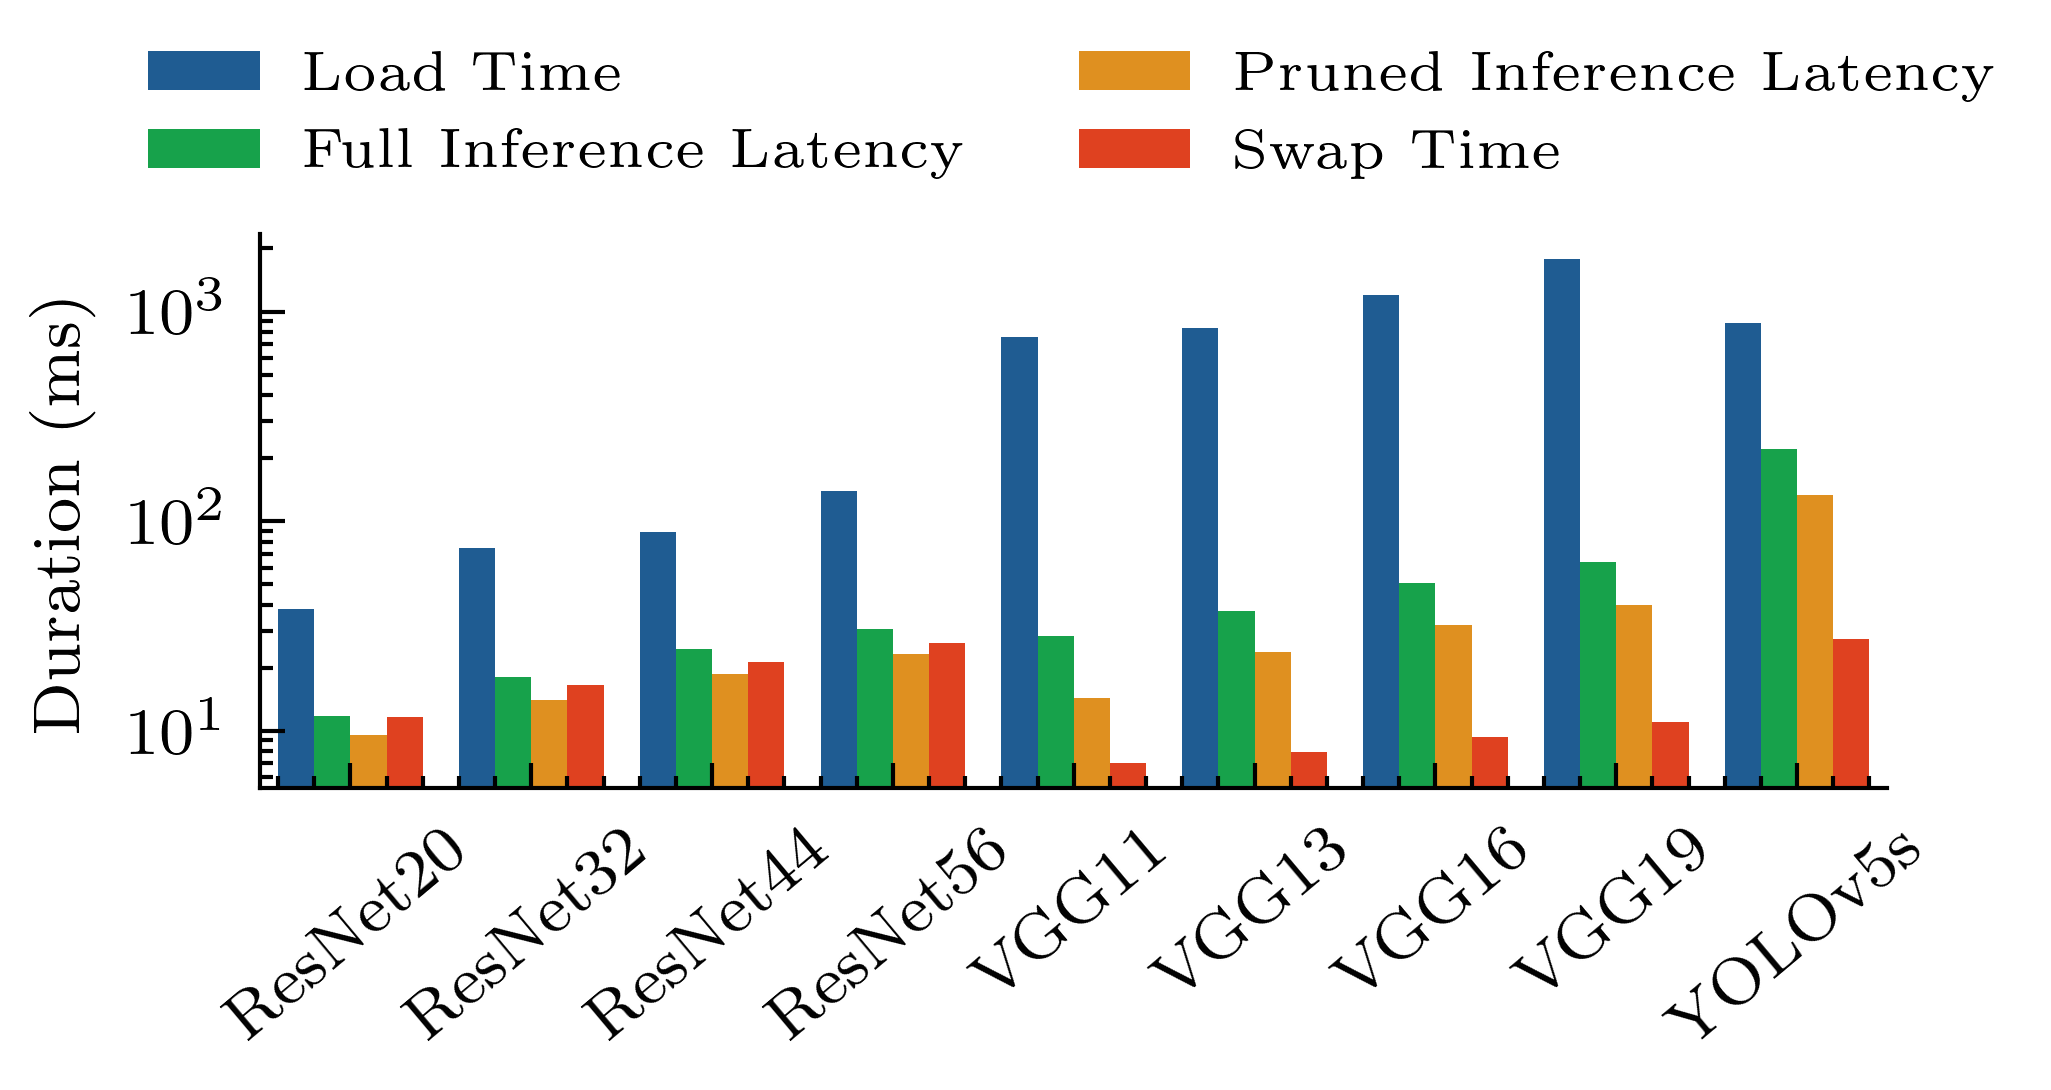

In [27]:
# x_axis_label = 'Model'
y_axis_label = 'Duration (ms)'

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, 1.2))
    ax = sns.barplot(data=df, x='Model Name', y='value', hue='variable')
    ax.set_yscale('log')
    ax.legend(title='', loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=2, fancybox=True, shadow=True, borderaxespad=0, fontsize='small')

    # Set custom axis labels
    ax.set_xlabel('')
    ax.set_ylabel(y_axis_label)

    # Despine the plot (remove right and top spines)
    sns.despine()

    # Remove tick labels from the top and right sides of the figure
    plt.tick_params(axis='both', which='both', top=False, right=False)
    
    # Rotatce xticks
    plt.xticks(rotation=40)
    
    # Manually add horizontal grid lines behind the bars
    # y_ticks = ax.get_yticks()
    # for y in y_ticks:
        # ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/swapping_barplot.pgf', bbox_inches='tight')
        plt.close()

# No Fine-tuning Plot

In [28]:
df = pd.read_csv('./results/finetuning.effect.csv')
df['Score'] *= 100
df['Score X'] *= 100
df = df.melt(id_vars=['Sparsity'], value_vars=['Score', 'Score X'])
df

,Sparsity,variable,value
0,1.211711,Score,46.990138
1,2.350129,Score,42.504207
2,3.600594,Score,45.683826
3,4.724570,Score,45.842989
4,6.041237,Score,44.127400
5,7.182448,Score,44.910146
6,8.430051,Score,45.500018
7,9.554082,Score,44.114402
8,10.782889,Score,44.674814
9,11.991601,Score,43.342106


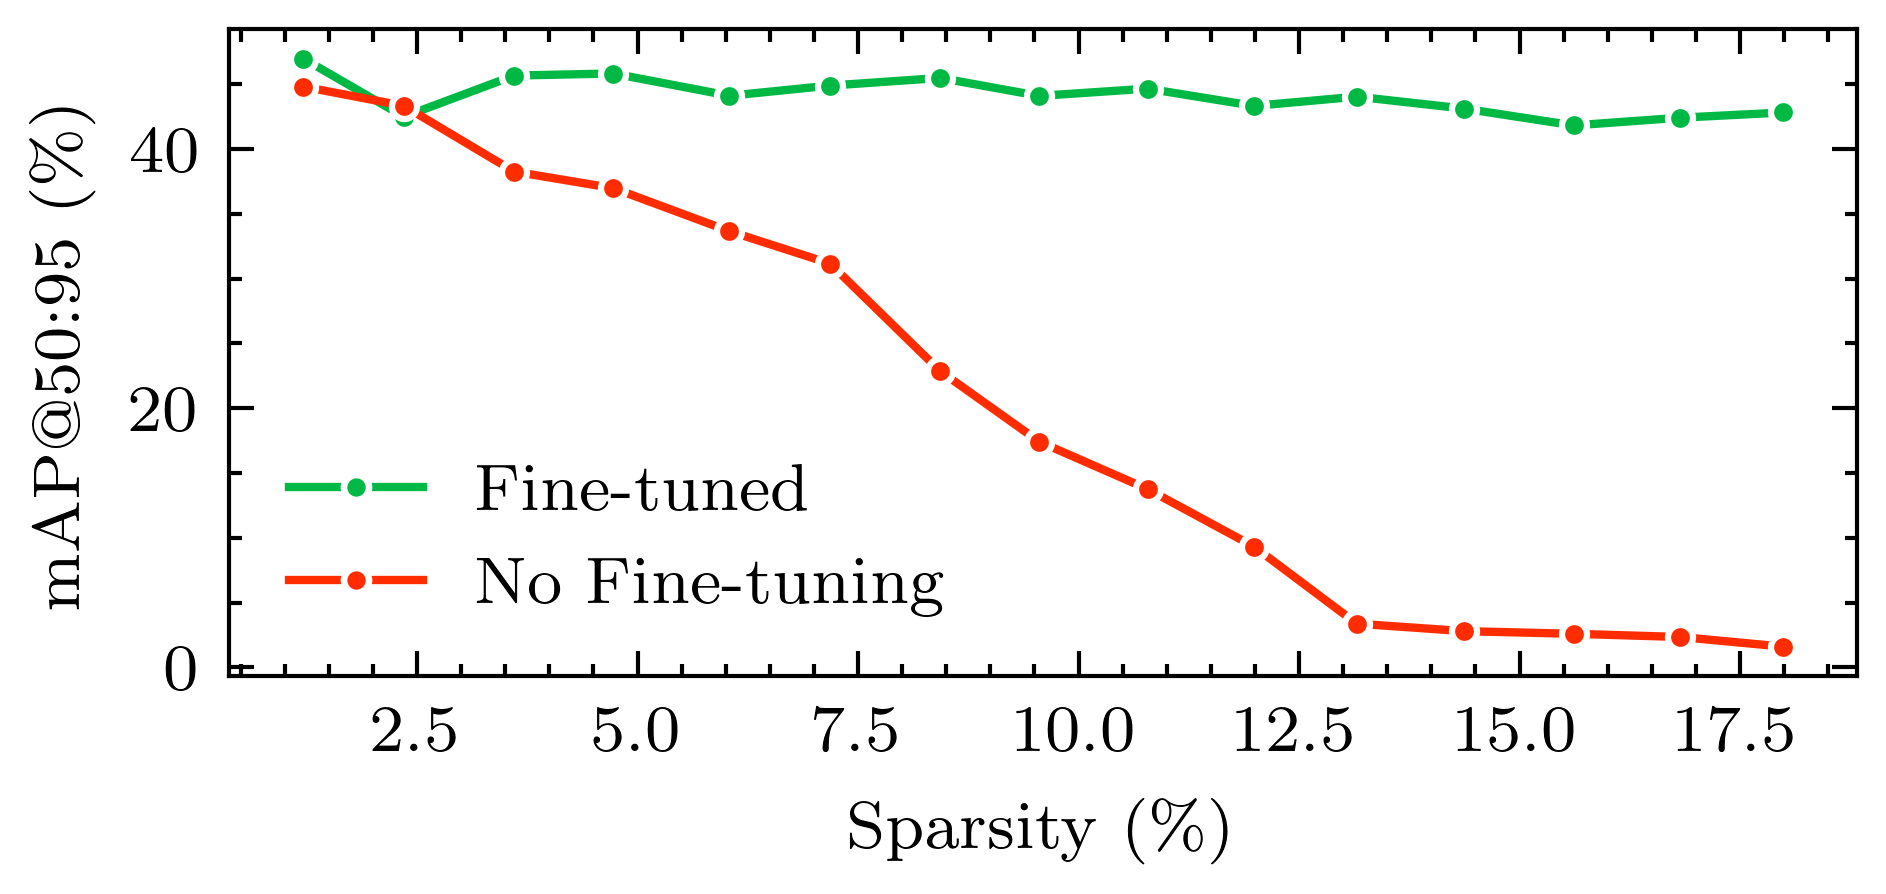

In [29]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

with plt.style.context(['science', 'ieee']):
    plt.rcParams['axes.prop_cycle'] = sci_cycle
    plt.figure(figsize=(column_width, column_width/2.5))
    
    ax = sns.lineplot(data=df, x='Sparsity', y='value', hue='variable', palette=[sci_cycle.by_key()['color'][1], sci_cycle.by_key()['color'][3]], marker='o', markersize=3)
    
    # sns.despine()
    
    ax.set_xlabel('Sparsity (\%)')
    ax.set_ylabel('mAP@50:95 (\%)')
    
    legend_handles = [Line2D([0], [0], color=sci_cycle.by_key()['color'][1], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='Fine-tuned'),
                      Line2D([0], [0], color=sci_cycle.by_key()['color'][3], marker='o', markersize=3, mec='#ffffff', mew=0.8, label='No Fine-tuning')]
    
    ax.legend(handles=legend_handles, loc='lower left')#, bbox_to_anchor=(0.5, 1.17), ncol=2, fontsize='x-small')
    
    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/no_tuning.pgf', bbox_inches='tight')
        plt.close()

# Fine-Tuning Plots

In [30]:
df = pd.read_csv('./latency.csv')
df['load_time'] *= 1E3
df = df.rename(columns={
    'load_time': 'Load Time',
    'inference_time': 'Inference Time',
    'swap_time': 'Swap Time',
    'model_name': 'Model',
})
df

,Model,Load Time,Inference Time,pruned_inference_time,Swap Time
0,VGG-11,718.0,74.380160,1,73.24
1,VGG-13,777.0,104.989527,1,74.24
2,VGG-16,1156.0,157.071100,1,146.51
3,VGG-19,1580.0,209.052128,1,127.62


In [31]:
df = pd.melt(df, id_vars=['Model'], value_vars=['Load Time', 'Inference Time', 'Swap Time'])
df

,Model,variable,value
0,VGG-11,Load Time,718.000000
1,VGG-13,Load Time,777.000000
2,VGG-16,Load Time,1156.000000
3,VGG-19,Load Time,1580.000000
4,VGG-11,Inference Time,74.380160
5,VGG-13,Inference Time,104.989527
6,VGG-16,Inference Time,157.071100
7,VGG-19,Inference Time,209.052128
8,VGG-11,Swap Time,73.240000
9,VGG-13,Swap Time,74.240000


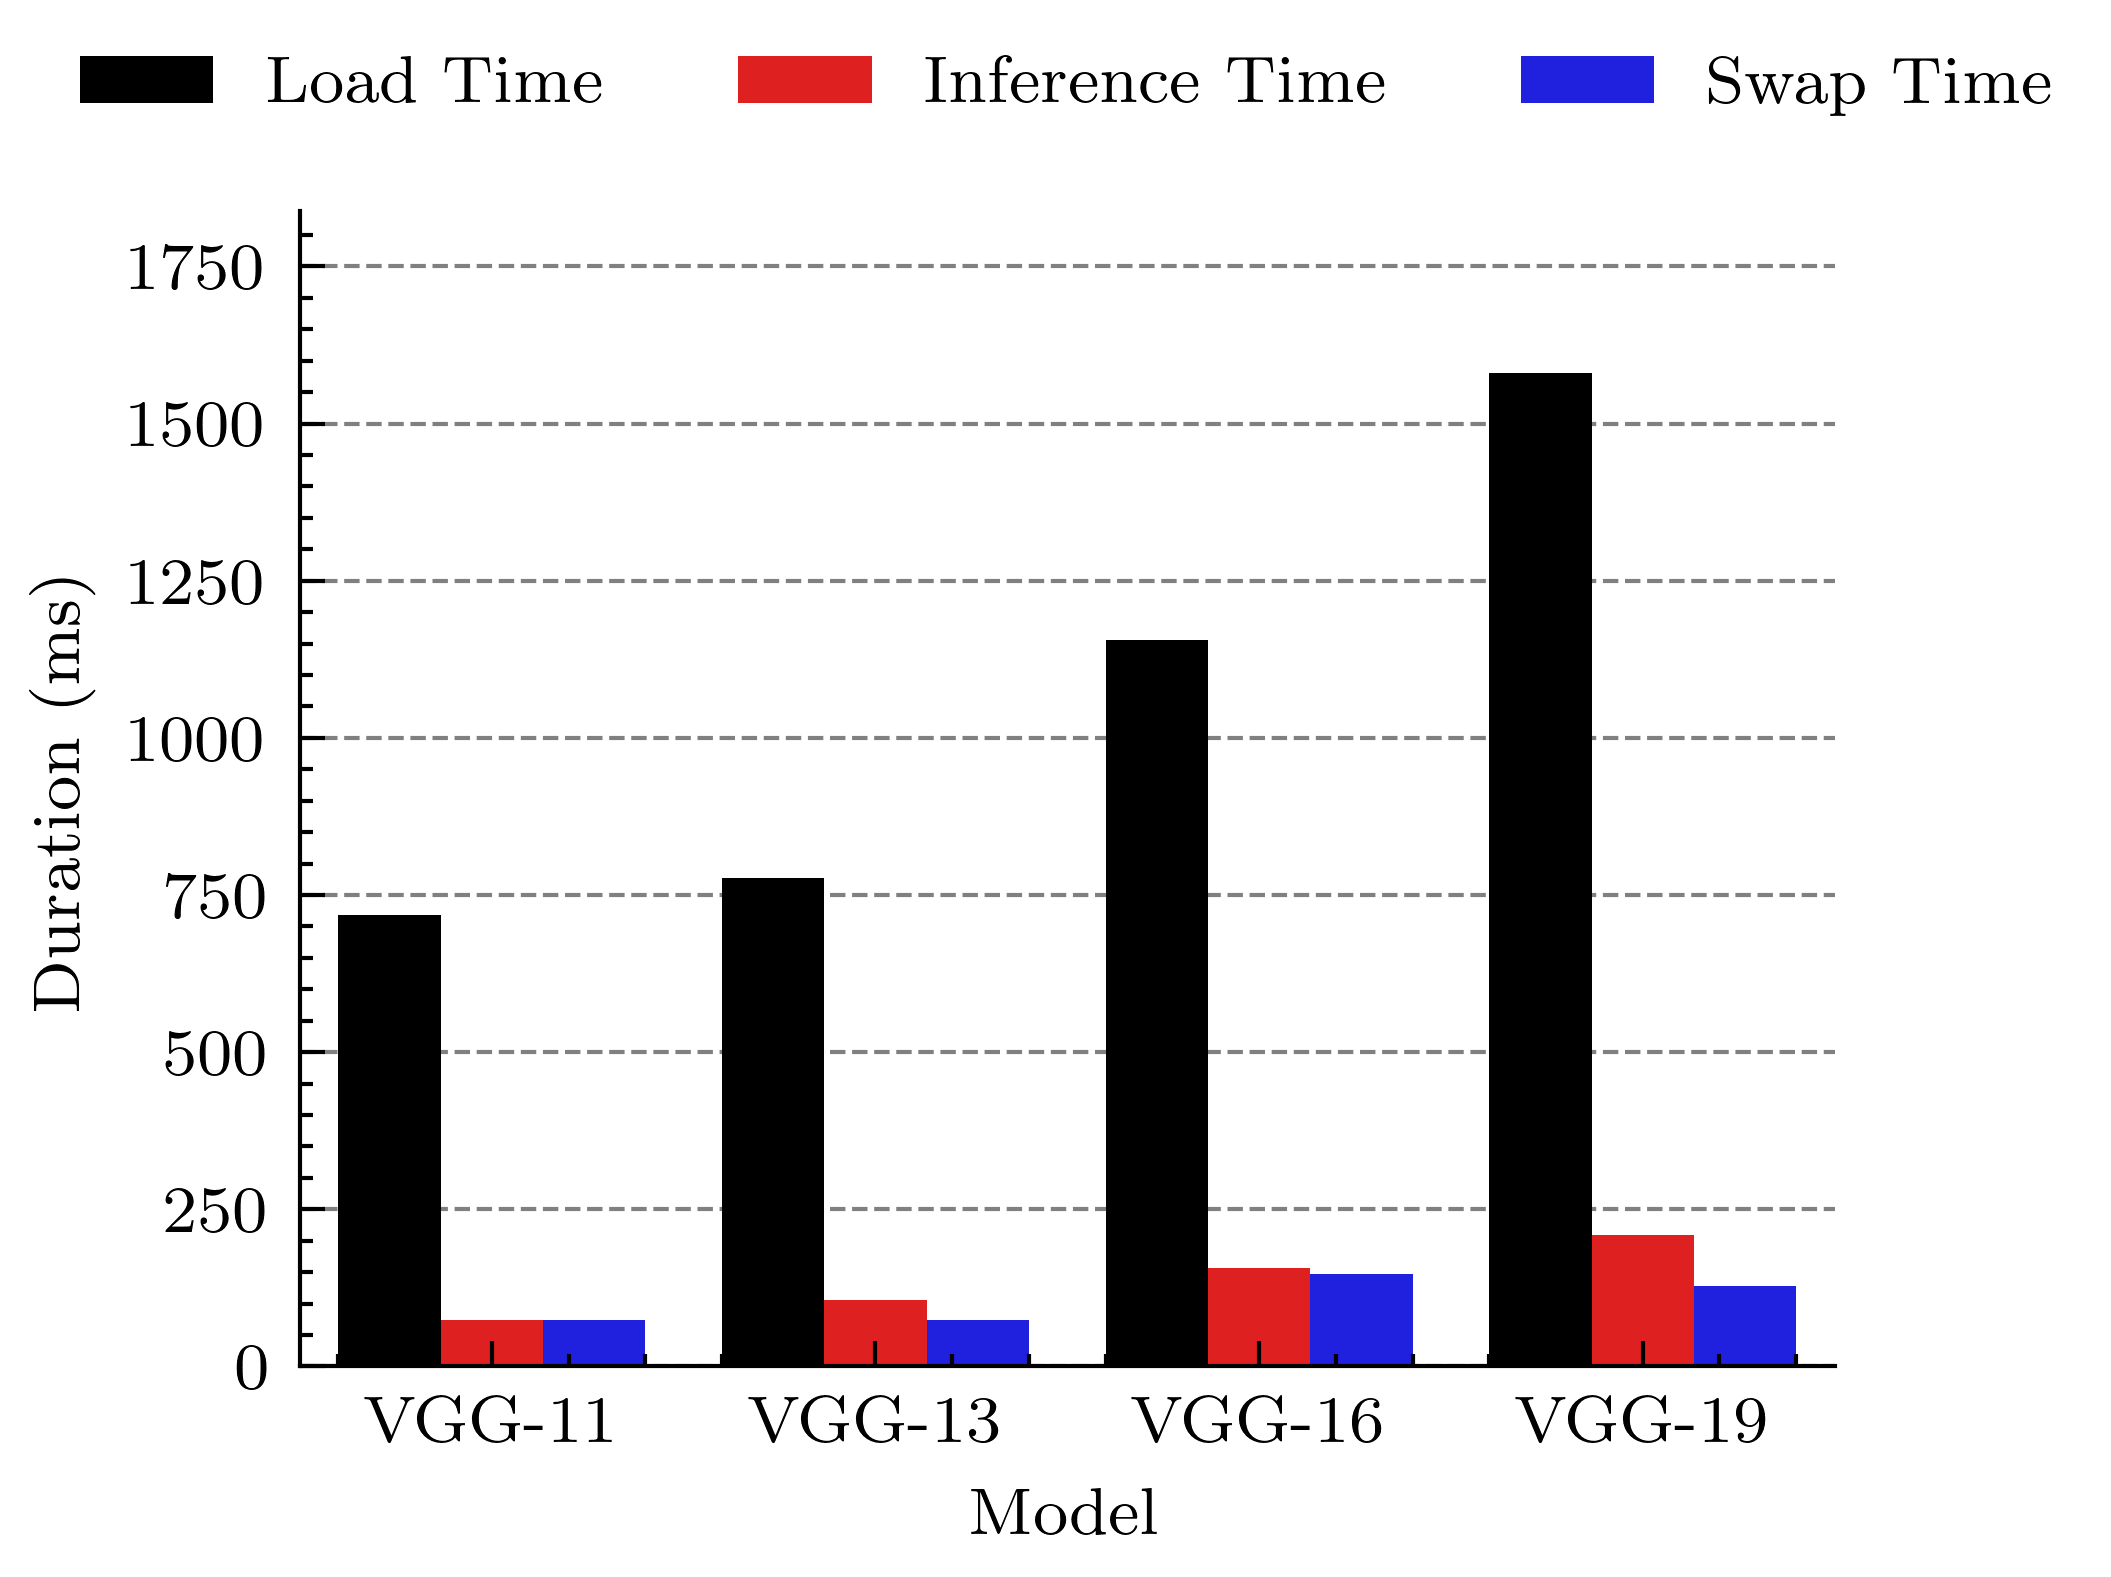

In [32]:
x_axis_label = 'Model'
y_axis_label = 'Duration (ms)'

# # Get the current figure size
# current_figsize = plt.gcf().get_size_inches()

# # Set the desired height (adjust the height value to your preference)
# desired_height = 3  # Change this value to adjust the height

# # Update the figure size with the desired height while keeping the width unchanged
# plt.gcf().set_size_inches(current_figsize[0], desired_height)

with plt.style.context(['science', 'ieee']):
    ax = sns.barplot(data=df, x='Model', y='value', hue='variable')
    ax.legend(title='', loc='lower center', bbox_to_anchor=(0.5, 1.06), ncol=3, fancybox=True, shadow=True, borderaxespad=0)

    # Set custom axis labels
    ax.set_xlabel(x_axis_label)
    ax.set_ylabel(y_axis_label)

    # Despine the plot (remove right and top spines)
    sns.despine()

    # Remove tick labels from the top and right sides of the figure
    plt.tick_params(axis='both', which='both', top=False, right=False)

    # Manually add horizontal grid lines behind the bars
    y_ticks = ax.get_yticks()
    for y in y_ticks:
        ax.axhline(y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

    if SHOW:
        plt.show()
    else:
        plt.savefig('./results/plots/swapping_barplot.pgf', bbox_inches='tight')

### Plot Fine-tuning Up & Down

In [41]:
df_down = pd.read_csv('./data_viz/cifar100_vgg11_bn_finetuning_down.csv')
df_up = pd.read_csv('./data_viz/cifar100_vgg11_bn_orig_acc1.csv')

In [42]:
df_down = df_down.loc[df_down['Step'] <= 124]

In [43]:
offset = (df_down['Step']).max()

In [45]:
df_up['Step'] += offset

In [46]:
df_up

,Wall time,Step,Value
0,1.696891e+09,124,0.6957
1,1.696891e+09,125,0.7014
2,1.696891e+09,126,0.7035
3,1.696891e+09,127,0.7041
4,1.696891e+09,128,0.7040
...,...,...,...
345,1.696898e+09,469,0.7180
346,1.696898e+09,470,0.7175
347,1.696898e+09,471,0.7189
348,1.696898e+09,472,0.7169


In [65]:
df = pd.concat([df_down, df_up])
df = df.loc[df['Step'] < 300]

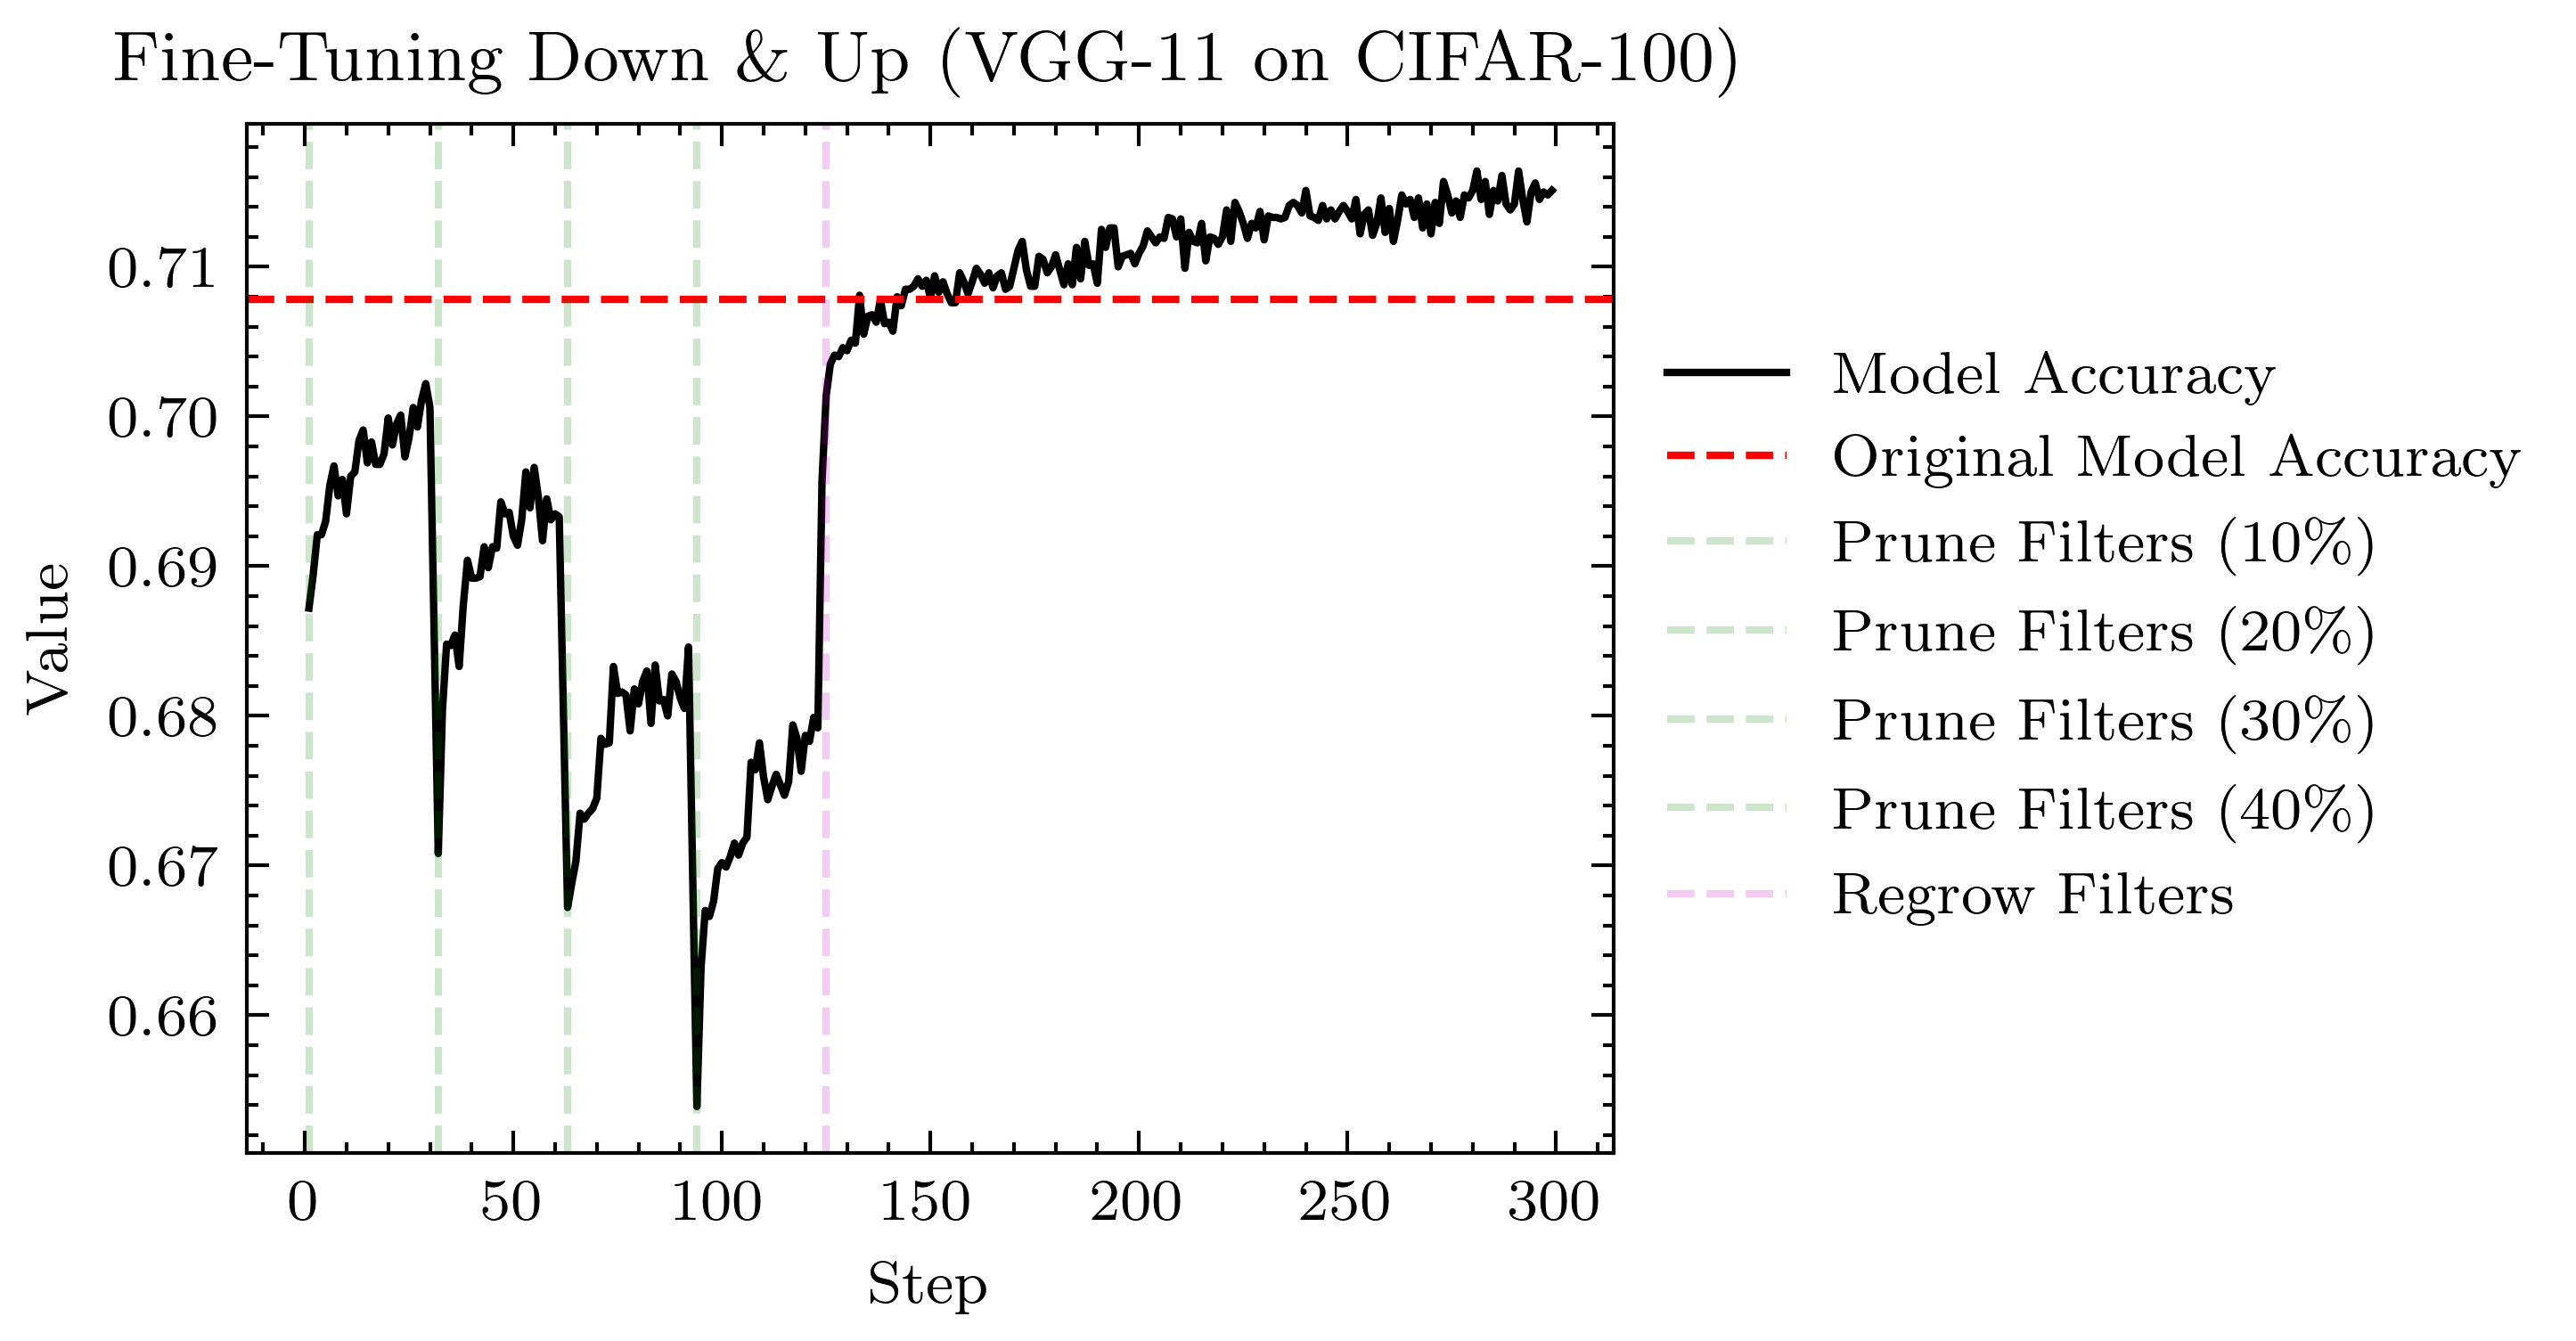

In [66]:
with plt.style.context(['science', 'ieee']):
    sns.lineplot(x='Step', y='Value', data=df, label='Model Accuracy')
    plt.axhline(y=0.7078, color='r', linestyle='--', label='Original Model Accuracy')
    
    plt.axvline(x=1, color='g', linestyle='--', label='Prune Filters (10\%)', alpha=0.2)
    plt.axvline(x=32, color='g', linestyle='--', label='Prune Filters (20\%)', alpha=0.2)
    plt.axvline(x=63, color='g', linestyle='--', label='Prune Filters (30\%)', alpha=0.2)
    plt.axvline(x=94, color='g', linestyle='--', label='Prune Filters (40\%)', alpha=0.2)
    plt.axvline(x=125, color='m', linestyle='--', label='Regrow Filters', alpha=0.2)
    
    plt.title("Fine-Tuning Down \& Up (VGG-11 on CIFAR-100)")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the figure to the right
    plt.show()